In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "../input/"
CATEGORIES = ["normal", "potholes"]


In [4]:
print(img_array)

[[244 214 235 ... 239 217 245]
 [216 158 156 ... 179 175 223]
 [234 151 137 ... 162 168 232]
 ...
 [226 153 144 ... 122 146 232]
 [215 161 160 ... 144 154 222]
 [255 222 233 ... 229 214 255]]


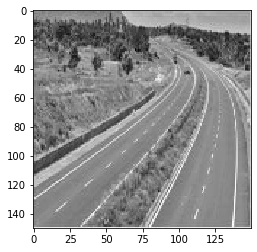

In [15]:
IMG_SIZE = 150

plt.imshow(new_array, cmap = 'gray')
plt.show()

In [25]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to pothole and normal dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()            

In [26]:
print(len(training_data))

680


In [27]:
import random

random.shuffle(training_data)

In [29]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
1
1
1
0
0
0


In [31]:
X = [] #feature set
y = [] #labels

In [42]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #1 because grayscale

In [43]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [44]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)